In [1]:
# I'm going to do the same basic analysis I did on one file (see test_ball.ipynb) on my new combined data table

In [2]:
import pandas as pd
import pyodbc
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# connect to my azure sql database

server = 'projectmbappe.database.windows.net'
database = 'Spotify'
username = 'shazayub774'
password = 'Ntqmskw4?'
driver = 'ODBC Driver 17 for SQL Server'  # This may differ based on your SQL Server driver

conn = pyodbc.connect(f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}")
conn_str = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}'

engine = create_engine(conn_str)

# loop to see if connection to sql server was successful
try:
    conn = pyodbc.connect(f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}")
    print("Success")
    conn.close
except pyodbc.Error as e:
        print(f"Error: {e}")

Success


In [6]:
# import the table from the databse into a dataframe 

query = 'SELECT * FROM full_data'

df = pd.read_sql(query, engine)

In [7]:
df.dtypes

ms_played                                     int64
spotify_track_uri                            object
master_metadata_track_name                   object
master_metadata_album_artist_name            object
master_metadata_album_album_name             object
spotify_episode_uri                          object
episode_show_name                            object
episode_name                                 object
reason_start                                 object
reason_end                                   object
shuffle                                        bool
skipped                                     float64
date_played                          datetime64[ns]
dtype: object

In [8]:
# # change the datatype of the date played column. This is something I should chanbge in the database afterwards. Changed it
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes

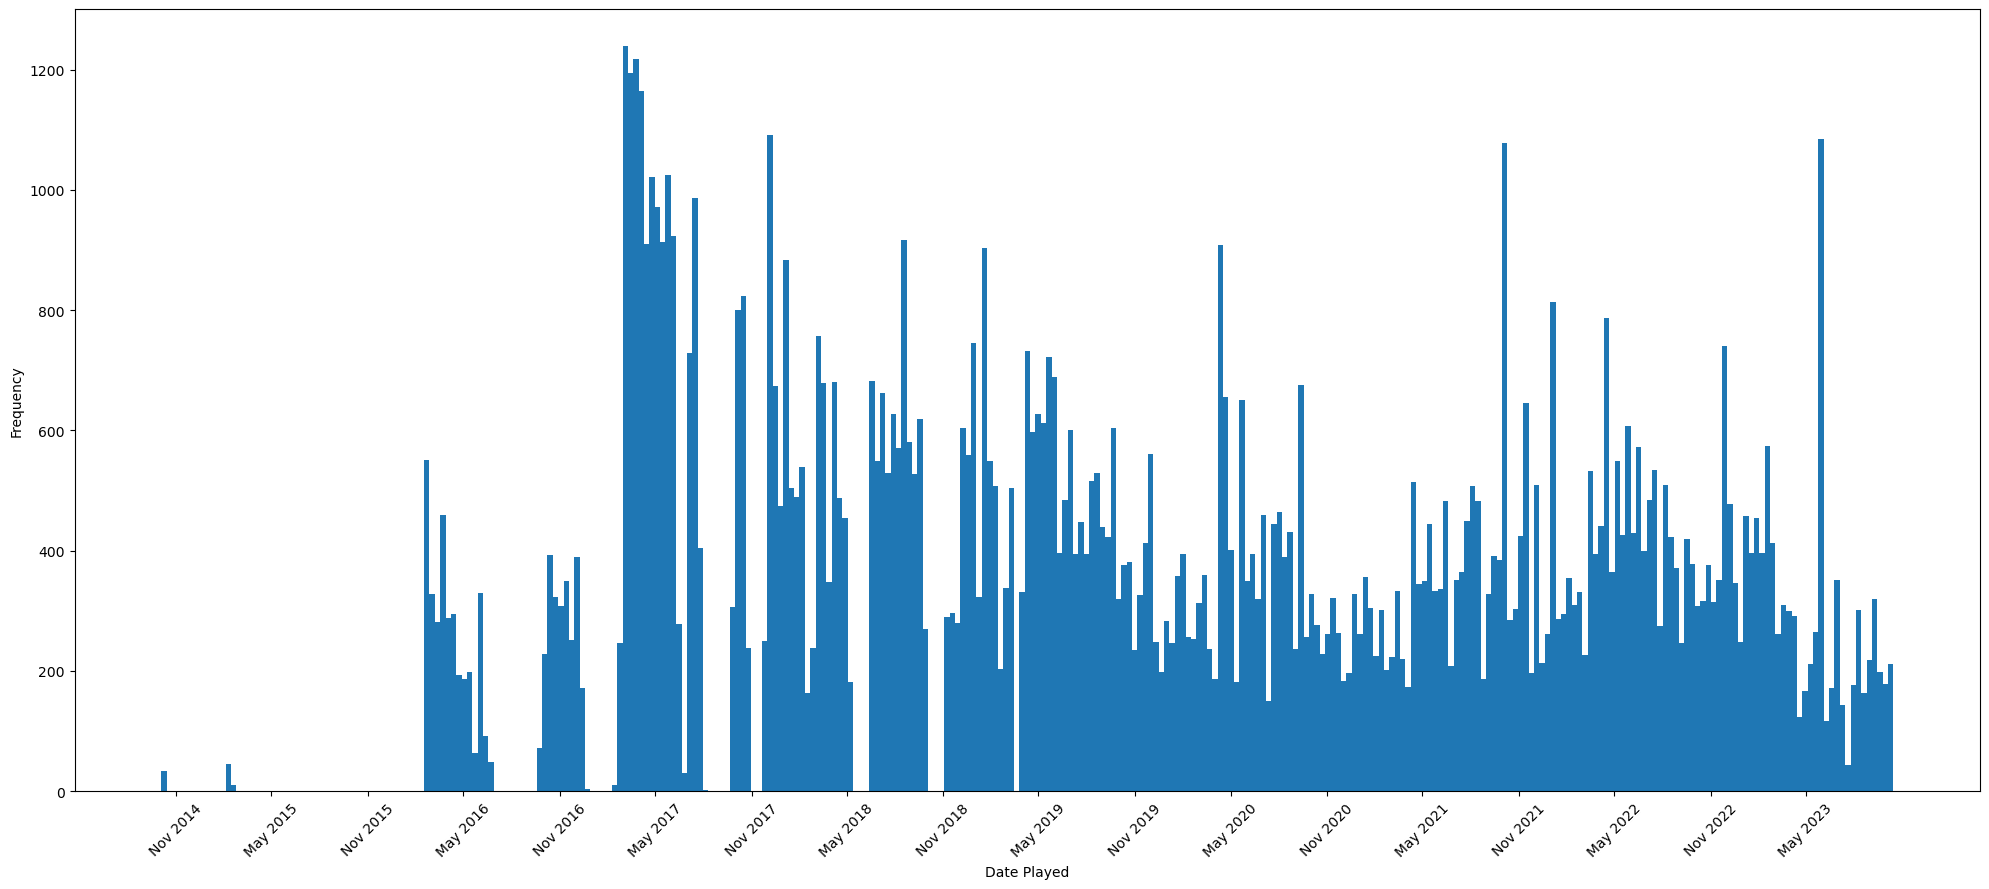

In [9]:
# i want to see when i listened to the most music so i created a histogram using date played
plt.figure(figsize=(20,9))
plt.hist(df['date_played'], bins = int(np.sqrt(len(df['date_played']))))
plt.xlabel('Date Played')
plt.ylabel('Frequency')
# i want the histogram x axis to read easier. i want it to create a label every 6 months
min_date = min(df['date_played'])
max_date = max(df['date_played'])
six_month_intervals = pd.date_range(start = min_date, end = max_date, freq = '6MS')
plt.xticks(six_month_intervals, [date.strftime('%b %Y') for date in six_month_intervals], rotation = 45)
plt.tight_layout()
plt.show()

In [10]:
int(np.sqrt(len(df['date_played'])))

323

In [11]:
# i want to see what my top 30 most listened to artists were
artists = df.groupby('master_metadata_album_artist_name').size().reset_index(name ='No. of times played')
most_played = pd.DataFrame(artists).sort_values(by = 'No. of times played', ascending = False)
top_30 = most_played.head(30)

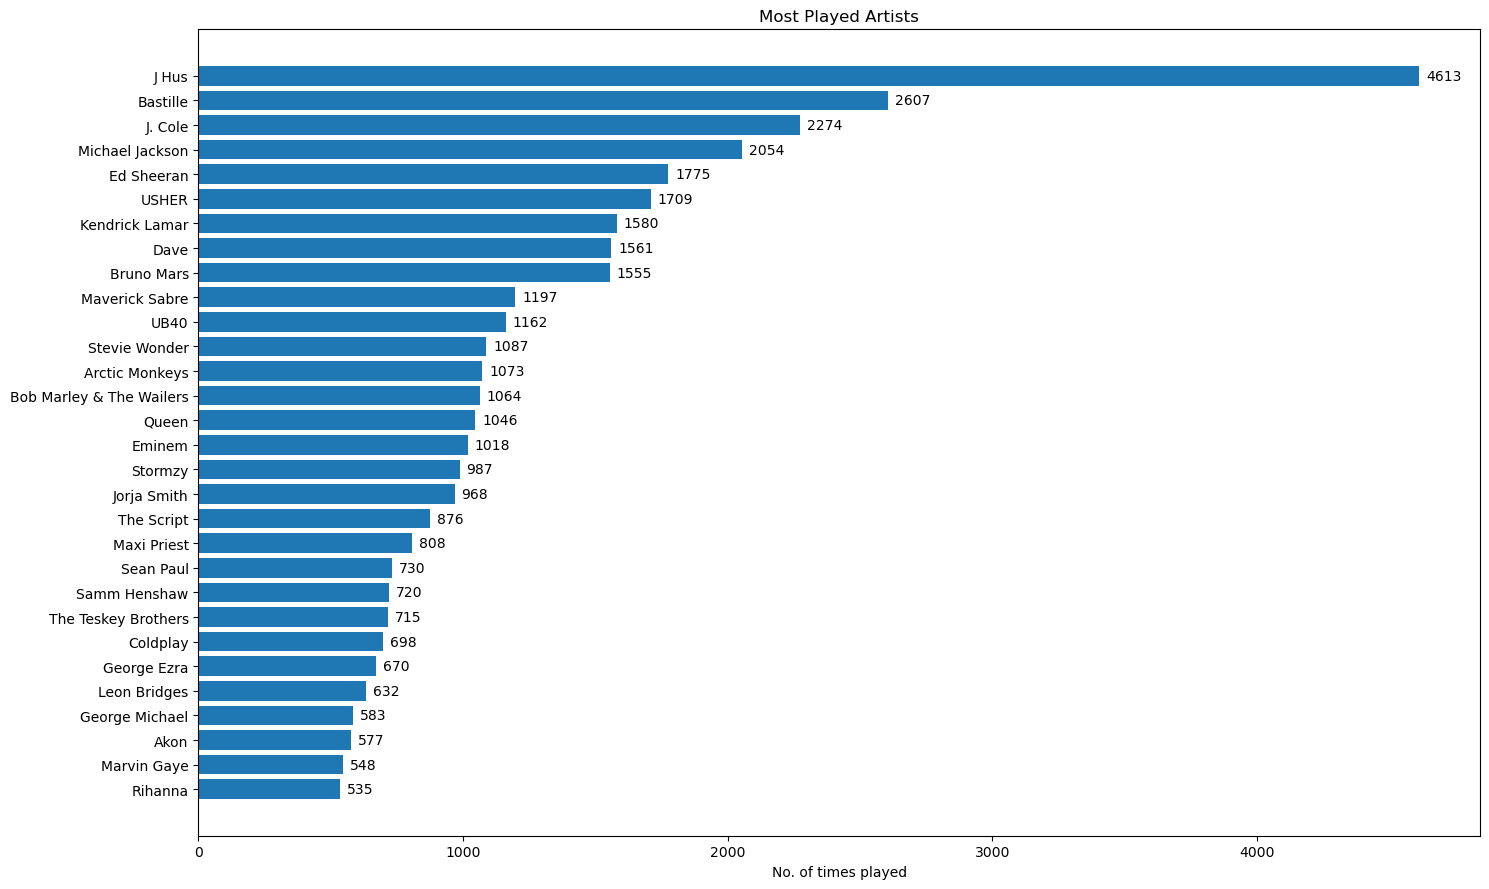

In [12]:
# i want to visualise this so i'm creating a bar chart
#top_30x = top_30[::-1]
plt.figure(figsize=(15,9))
bars = plt.barh(top_30['master_metadata_album_artist_name'], top_30['No. of times played'])
plt.title('Most Played Artists')
plt.xlabel('No. of times played')
plt.bar_label(bars, labels=top_30['No. of times played'], label_type='edge', fontsize=10, padding = 5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
# i want to see what my top 30 most listened to artists were
tracks = df.groupby('master_metadata_track_name').size().reset_index(name ='No. of times played')
most_played_t = pd.DataFrame(tracks).sort_values(by = 'No. of times played', ascending = False)
top_30_t = most_played_t.head(30)
top_30_t

,master_metadata_track_name,No. of times played
1791,Did You See,260
5772,Rain,251
7471,This Is the One - Remastered,231
7761,U Remind Me,219
7722,Turn Me On,218
5588,Playing Sports,211
2141,End Of The Road,200
3806,It's Not That Easy,196
2093,Easy,196
5010,Never Too Much,194


In [19]:
group = df.groupby('spotify_track_uri')['master_metadata_track_name'].agg(list).reset_index()
group

,spotify_track_uri,master_metadata_track_name
0,spotify:track:000xQL6tZNLJzIrtIgxqSl,[Still Got Time (feat. PARTYNEXTDOOR)]
1,spotify:track:001tGjS4WX77wtQGCP8Sfm,"[Ladies, Ladies, Ladies (with JID feat. T.I.)]"
2,spotify:track:003vvx7Niy0yvhvHt4a68B,"[Mr. Brightside, Mr. Brightside, Mr. Brightside]"
3,spotify:track:00BHe2yBtdOzhKPmI7rpTE,"[Locked Up, Locked Up, Locked Up, Locked Up, L..."
4,spotify:track:00Blm7zeNqgYLPtW6zg8cj,[One Right Now (with The Weeknd)]
...,...,...
11277,spotify:track:7ziHnshbknkpFLDW5yGBjO,"[Never Ever, Never Ever, Never Ever, Never Eve..."
11278,spotify:track:7zj3PUofG1kCXhNdShLkzY,[Morning Sun]
11279,spotify:track:7znGjMYHc3Fgb8MIDnDj1h,[Be Without You - Kendu Mix]
11280,spotify:track:7zvKFw17XyoBUx9mHiwzPy,"[Rice Balls, Rice Balls]"
